In [29]:
import csv
import numpy as np
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.layers import Dense, SimpleRNN
from keras.models import Model, Sequential

## Get data from disk

In [79]:
corpus = ''
with open('companies.csv', newline='') as csvfile:
  reader = csv.reader(csvfile, delimiter=' ')
  for row in reader:
     corpus += row[0] + ' '

## Get a unique identifier for each char

In [80]:
# Get a unique identifier for each char in the corpus,
# then make some dicts to ease encoding and decoding
chars = sorted(list(set(corpus)))
num_chars = len(chars)
encoding = {c: i for i, c in enumerate(chars)}
decoding = {i: c for i, c in enumerate(chars)}

print("Our corpus contains {0} unique characters.".format(num_chars))


Our corpus contains 142 unique characters.


## Prepare data

In [81]:
# chop up our data into X and y, slice into roughly
# (num_chars / skip) overlapping 'sentences' of length
# sentence_length, and encode the chars
sentence_length = 10
skip = 3
X_data = []
y_data = []

for i in range (0, len(corpus) - sentence_length, skip):
  sentence = corpus[i:i + sentence_length]
  next_char = corpus[i + sentence_length]
  X_data.append([encoding[char] for char in sentence])
  y_data.append(encoding[next_char])

num_sentences = len(X_data)
print("Sliced our corpus into {0} sentences of length {1}".format(num_sentences, sentence_length))

Sliced our corpus into 478065 sentences of length 10


In [82]:
print(X_data[0])

[37, 61, 79, 68, 76, 72, 61, 85, 0, 43]


In [83]:
print([decoding[idx] for idx in X_data[0]])
print(decoding[y_data[0]])

['H', 'a', 's', 'h', 'p', 'l', 'a', 'y', ' ', 'N']
e


## Vectorize our data and labels. We want everything in one-hot.

In [84]:
X = np.zeros((num_sentences, sentence_length, num_chars),dtype=np.bool)
y = np.zeros((num_sentences, num_chars), dtype=np.bool)
for i, sentence in enumerate(X_data):
  for t, encoded_char in enumerate(sentence):
    X[i, t, encoded_char] = 1
    y[i, y_data[i]] = 1

## Double check our vectorized data before we sink hours into fitting a model

In [85]:
print("Sanity check y. Dimension: {0} # Sentences: {1} Characters in corpus: {2}".format(y.shape, num_sentences, len(chars)))
print("Sanity check X. Dimension: {0}  Sentence length: {1}".format(X.shape, sentence_length))

Sanity check y. Dimension: (478065, 142) # Sentences: 478065 Characters in corpus: 142
Sanity check X. Dimension: (478065, 10, 142)  Sentence length: 10


## Define model

In [88]:
model = Sequential()
model.add(SimpleRNN(128, input_shape=(sentence_length, num_chars), return_sequences=False))
model.add(Dense(num_chars, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 128)               34688     
_________________________________________________________________
dense_3 (Dense)              (None, 142)               18318     
Total params: 53,006
Trainable params: 53,006
Non-trainable params: 0
_________________________________________________________________


## Training

In [89]:
history = model.fit(X, y, epochs=50, batch_size=256)

Epoch 1/50
1868/1868 [==============================] - 52s 27ms/step - loss: 3.1334 - accuracy: 0.1841
Epoch 2/50
1868/1868 [==============================] - 44s 23ms/step - loss: 2.5761 - accuracy: 0.2908
Epoch 3/50
1868/1868 [==============================] - 44s 23ms/step - loss: 2.4785 - accuracy: 0.3204
Epoch 4/50
1868/1868 [==============================] - 44s 23ms/step - loss: 2.4270 - accuracy: 0.3337
Epoch 5/50
1868/1868 [==============================] - 44s 23ms/step - loss: 2.3925 - accuracy: 0.3440
Epoch 6/50
1868/1868 [==============================] - 44s 24ms/step - loss: 2.3610 - accuracy: 0.3532
Epoch 7/50
1868/1868 [==============================] - 48s 25ms/step - loss: 2.3410 - accuracy: 0.3586
Epoch 8/50
1868/1868 [==============================] - 47s 25ms/step - loss: 2.3190 - accuracy: 0.3636
Epoch 9/50
1868/1868 [==============================] - 46s 24ms/step - loss: 2.3047 - accuracy: 0.3679
Epoch 10/50
1868/1868 [==============================] - 44s 24m

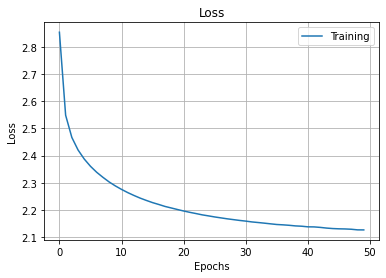

In [90]:
plt.plot(history.history['loss'], label='Training')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

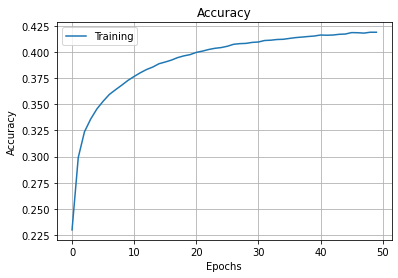

In [91]:
plt.plot(history.history['accuracy'], label='Training')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

## Prediction

In [92]:
def make_seed(seed_phrase=""):
  if seed_phrase:
    phrase_length = len(seed_phrase)
    pattern = ""
    for i in range (0, sentence_length):
      pattern += seed_phrase[i % phrase_length]
  else:
    seed = randint(0, corpus_length - sentence_length)
    pattern = corpus[seed:seed + sentence_length]
  return pattern

In [98]:
seed_pattern = make_seed("energy")

X = np.zeros((1, sentence_length, num_chars), dtype=np.float)
for i, character in enumerate(seed_pattern):
  X[0, i, encoding[character]] = 1

In [99]:
generated_text = ""
for i in range(12):
  output_prob = model.predict(X, verbose=0)[0]
  prediction = np.random.choice(num_chars, p = output_prob )
  generated_text += decoding[prediction]
  activations = np.zeros((1, 1, num_chars), dtype=np.bool)
  activations[0, 0, prediction] = 1

  X = np.concatenate((X[:, 1:, :], activations), axis=1)
print(generated_text)

ana Sensid b
